# Week 6 - Machine learning by example - Solutions

### Exercise 1

In the original paper (and as we have done above), `age` and `gender` variables are dropped as features. Re-run the analysis with these features. How might the inclusion of these variables affect the conclusions of the paper?

We'll simply rerun part of our analysis from the lecture, omitting to drop the `age` and `gender` variables. We'll also make the choice (as suggested in the lecture) to include the latest available measurement per patient to avoid so much missing data.



In [1]:
import datetime

import pandas as pd

In [2]:
TRAIN_PATH = '../data/time_series_375_preprocess_en.xlsx'
RANDOM_SEED = 42

In [19]:
def load_training_data(path):
    """ Load Excel sheet of measurements from patients (timepandas.DataFrame with MultiIndex ['PATIENT_ID', 'RE_DATE'] (the unique patient identifier and patient sample date, corresponding to columns [0,1] respectively of the loaded worksheet), then for each column retain the latest measurement made per patient, drop 'Admission time', 'Discharge time',features.
    """

    # Specify explicitly what columns we want to load and what their data types are expected to be.
    DTYPES = {
        'PATIENT_ID': int,
        'RE_DATE': str,
        'age': int,
        'gender': int,
        'Admission time': str,
        'Discharge time': str,
        'outcome': float,
        'Hypersensitive cardiac troponinI': float,
        'hemoglobin': float,
        'Serum chloride': float,
        'Prothrombin time': float,
        'procalcitonin': float,
        'eosinophils(%)': float,
        'Interleukin 2 receptor': float,
        'Alkaline phosphatase': float,
        'albumin': float,
        'basophil(%)': float,
        'Interleukin 10': float,
        'Total bilirubin': float,
        'Platelet count': float,
        'monocytes(%)': float,
        'antithrombin': float,
        'Interleukin 8': float,
        'indirect bilirubin': float,
        'Red blood cell distribution width': float,
        'neutrophils(%)': float,
        'total protein': float,
        'Quantification of Treponema pallidum antibodies': float,
        'Prothrombin activity': float,
        'HBsAg': float,
        'mean corpuscular volume': float,
        'hematocrit': float,
        'White blood cell count': float,
        'Tumor necrosis factorα': float,
        'mean corpuscular hemoglobin concentration': float,
        'fibrinogen': float,
        'Interleukin 1β': float,
        'Urea': float,
        'lymphocyte count': float,
        'PH value': float,
        'Red blood cell count': float,
        'Eosinophil count': float,
        'Corrected calcium': float,
        'Serum potassium': float,
        'glucose': float,
        'neutrophils count': float,
        'Direct bilirubin': float,
        'Mean platelet volume': float,
        'ferritin': float,
        'RBC distribution width SD': float,
        'Thrombin time': float,
        '(%)lymphocyte': float,
        'HCV antibody quantification': float,
        'D-D dimer': float,
        'Total cholesterol': float,
        'aspartate aminotransferase': float,
        'Uric acid': float,
        'HCO3-': float,
        'calcium': float,
        'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)': float,
        'Lactate dehydrogenase': float,
        'platelet large cell ratio ': float,
        'Interleukin 6': float,
        'Fibrin degradation products': float,
        'monocytes count': float,
        'PLT distribution width': float,
        'globulin': float,
        'γ-glutamyl transpeptidase': float,
        'International standard ratio': float,
        'basophil count(#)': float,
        '2019-nCoV nucleic acid detection': float,
        'mean corpuscular hemoglobin': float,
        'Activation of partial thromboplastin time': float,
        'High sensitivity C-reactive protein': float,
        'HIV antibody quantification': float,
        'serum sodium': float,
        'thrombocytocrit': float,
        'ESR': float,
        'glutamic-pyruvic transaminase': float,
        'eGFR': float,
        'creatinine': float
    }

    # Specify which string columns should be interpreted as datetimes.
    DATETIME_COLUMNS = ['RE_DATE', 'Admission time', 'Discharge time']
    
    return (
        pd.read_excel(path, index_col=[0,1], dtype=DTYPES, parse_dates=DATETIME_COLUMNS)
            .sort_index()
            .groupby('PATIENT_ID').ffill()
            .groupby('PATIENT_ID').tail(1)
            .drop(['Admission time', 'Discharge time'], axis=1)
    )

In [20]:
def remove_columns_with_missing_data(df, threshold=0.2):
    """ Remove all columns from DataFrame df where the proportion of missing records is greater than threshold.
    """
    # Note: in Pandas >=1.0.0, you can use `data_df = data_df.dropna(axis=1, threshold=0.2*len(data_df))`
    keep_cols = df.isnull().sum() <= threshold*len(df)
    return df.loc[:,keep_cols]

Load the training data and take a look at the structure of the DataFrame.

In [5]:
data = load_training_data(path=TRAIN_PATH)
print(data.shape)
data.head()

(375, 77)


,,age,gender,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,RE_DATE,,,,,,,,,,,,,,,,,,,,,
1,2020-02-17 08:31:00,73,1,0.0,19.9,131.0,100.0,12.4,0.09,1.7,NaN,...,32.3,38.9,2.6,0.09,142.7,0.16,41.0,30.0,74.7,88.0
2,2020-02-17 15:34:00,61,1,0.0,1.9,149.0,98.1,12.3,0.09,0.1,441.0,...,32.2,36.0,27.4,NaN,137.4,0.27,40.0,22.0,94.6,74.0
3,2020-02-06 23:15:00,70,2,0.0,NaN,126.0,102.2,13.6,0.06,0.1,591.0,...,33.3,34.8,3.6,0.10,143.2,0.23,29.0,67.0,84.6,64.0
4,2020-02-17 08:31:00,74,1,0.0,4.8,103.0,103.1,16.3,0.38,2.5,NaN,...,39.2,NaN,14.5,0.11,144.2,0.27,72.0,26.0,74.2,88.0
5,2020-02-18 09:35:00,29,2,0.0,5.6,130.0,102.2,14.6,0.02,3.0,258.0,...,30.0,NaN,0.8,0.08,143.6,0.36,11.0,18.0,122.8,54.0


Now remove those columns with greater than 20% of the data missing, and fill the remaining NA's with -1. Leaves us with a dataset with 55 features and 375 samples (in this case, one sample corresponds to one patient).

In [21]:
data = remove_columns_with_missing_data(data).fillna(-1)
x = data.drop('outcome', axis=1)
y = data.outcome
x.shape

(375, 55)

Now separate 30% of the data for a test set and train our XGBoost classifier exactly as per the lecture.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)

In [8]:
import xgboost

xgboost_params = {
    'max_depth': 4, # How deep do we allow the individual decision trees?
    'learning_rate': 0.2, # How much is each additional tree allowed to optimise the current fit?
    'reg_lambda': 1, # How do we restrict the fit model by penalising its complexity?
    'n_estimators': 150, # How many trees in the forest?
    'subsample': 0.9, # Proportion of rows of the training data to sample for each new tree.
    'colsample_bytree': 0.9, # Proportion of columns of the training data to sample for each new tree.
    'seed': RANDOM_SEED
}
xgboost_classifier = xgboost.XGBClassifier(**xgboost_params)
xgboost_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.9, verbosity=1)

If we now inspect the feature importances once again, we see that the inclusion of age and gender appears to have essentially no effect on the model.

In [9]:
feature_names, feature_importances = zip(*sorted(
    zip(x.columns, xgboost_classifier.feature_importances_),
    key=lambda _: _[1],
    reverse=True
))

In [10]:
feature_names[0:10], feature_importances[0:10]

(('Lactate dehydrogenase',
  '(%)lymphocyte',
  'serum sodium',
  'eosinophils(%)',
  'Serum chloride',
  'mean corpuscular volume',
  'High sensitivity C-reactive protein',
  'neutrophils(%)',
  'total protein',
  'monocytes(%)'),
 (0.26087114,
  0.2101254,
  0.06919403,
  0.05891983,
  0.05266585,
  0.05119322,
  0.042886887,
  0.029689236,
  0.02788018,
  0.018641127))

### Exercise 2

Using the data from Lecture 5's Linear Regression example, train and evaluate a classifier to determine whether a patient will survive >150 days.

We'll load the data as per Lecture 5, then create outcome variable `y`, which is 1 when the patient survives `>150` days, and `0` otherwise. We'll use the same variables as in Lecture 5's multivariate regression example, and make use of some more sckit-learn to build our training and prediction pipeline. As it happens, the model we arrive at is pretty poor!

The definition of the `ER_status_binary` column, uses a `pandas.DataFrame` method called `map`. It takes a single argument which is a `dict`ionary mapping the `str`ings 'Positive' and 'Negative', to `float`s 1.0 and 0.0 respectively (alternatively, we could use the sklearn.preprocessing.OrdinalEncoder to achieve the same result).

To train the classifier, we need to map the `metabric.Survival_time` series to 0.0's and 1.0's, depending on whether the value is less than or greater than 150 days. We make use of *broadcasting*, whereby the `<` operator may be placed between a `pandas.Series` and the scalar `150` to return another `pandas.Series` of `bool`eans. That series is cast to `float`s using `.astype(float)`.

In [11]:
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric['ER_status_binary'] = metabric.ER_status.map({'Positive': 1.0, 'Negative': 0.0})
y = (metabric.Survival_time > 150).astype(float)
x = metabric.loc[:,['Tumour_size', 'Tumour_stage', 'Cancer_type', 'ER_status_binary']]


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, QuantileTransformer

In [23]:
preprocessor = ColumnTransformer(
    transformers = [
        ('tumor_size_transformer', QuantileTransformer(output_distribution='normal', random_state=0), ['Tumour_size']),
        ('tumor_stage_cancer_type_transformer', OneHotEncoder(), ['Tumour_stage', 'Cancer_type']),
    ],
    remainder='passthrough'
)

xgboost_classifier = xgboost.XGBClassifier()
pipeline = Pipeline(steps = [
    ('preprocess', preprocessor),
    ('xgboost', xgboost_classifier)
])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('tumor_size_transformer',
                                                  QuantileTransformer(copy=True,
                                                                      ignore_implicit_zeros=False,
                                                                      n_quantiles=1000,
                                                                      output_distribution='normal',
                                                                      random_state=0,
                                                                      subsample=100000),
                                                  ['Tumour_size']),
                                                 ('tumor_stage_...
  

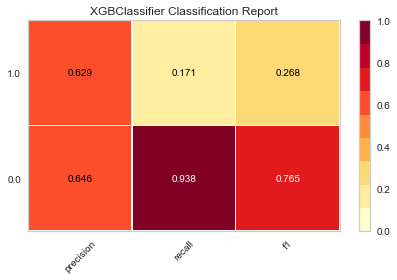

In [17]:
import yellowbrick as yb

visualizer = yb.classifier.ClassificationReport(model=pipeline)
visualizer.score(x_test, y_test)
visualizer.show()

As a alternative to the custom `matplotlib` ROC curve plotted in the lecture, we can use `yellowbrick` to make a similar plot. The equivalent curve to those plotted in the lecuture is the one labelled "ROC of class 1.0, AUC = 0.65" in the legend. 

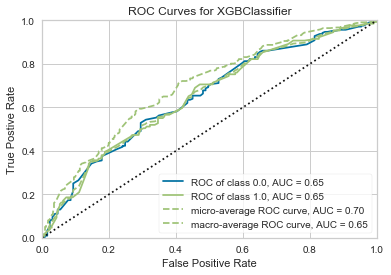

In [18]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model=pipeline)
visualizer.score(x_test, y_test)
visualizer.show() 

Just a quick note on how the ROC curve is derived. Most of the classifiers in sklearn will emit a 'score'. Every point along the ROC curve corresponds to a choice of threshold for this score: a score greater than the chosen threshold corresponds to 1.0, and vice-versa. We form the ROC curve by evaluating what the true-positive rate and false-positive rates are as we adjust the threshold: raising the threshold takes us from the top-right to the bottom-left of the curve.

Confirming the story told by the `ClassificationReport`, it looks like our model is doing a pretty poor job. A choosing point in the middle of the ROC at approximately (0.4, 0.6),we can state that, "In our test set, to correctly identify 60% of the patients who will survive longer than 150 days, we will incorrectly predict 40% of the patients who will not survive beyond 150 days will do so.". We can trade true-positives for false-positives by lowering the threshold, and balancing those priorities is application specific. 

While we have used XGBoost as our classifier in this example, in a real scenario it always a good idea to first train a very simple model as a baseline. In this case, comparison of the XGBoost model with multiple explanatory variables could be compared with a simple LogisticRegression in a single variable (e.g. `Tumour_size` as in Lecture 5 - Simple linear regression). Reaching for the best metrics on your available training and test data should always be weighed against the additional complexity your solution introduces, its ability to generalise to new data, ease of explainability, and performance considerations. Measuring relative improvement against simple baselines helps to evaluate those trade-offs.


## Additional resources

A superb community curated list of resources is at [Awesome machine learning](https://github.com/josephmisiti/awesome-machine-learning).

### Books

If time is of the essence, for a concise but gentle introduction to machine learning that has examples in Python, [The hundred page machine learning book](http://themlbook.com/) 
is tough to beat.

For more Python specifics, Joel Grus [Data science from scratch](https://www.oreilly.com/library/view/data-science-from/9781492041122/) I'm told is good (and has code examples).

For more mathematical background, a personal favourite is Murphy's [Machine learning: a probabilistic perspective](https://www.cs.ubc.ca/~murphyk/MLbook/).

### Online courses

I love the original Stanford courses run by Andrew Ng [Youtube playlist](https://www.youtube.com/view_play_list?p=A89DCFA6ADACE599)(assumes some basic linear algebra and calculus, and doesn't have any programming). These have evolved into Coursera's [Machine Learning](https://www.coursera.org/learn/machine-learning), which is fantastic (and free if you don't need the certification).




